In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [ ]:
df = pd.read_csv("2-multiplegradesdataset.csv")

In [4]:
df.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
0,4.7,7.3,82.9,3.3,80.7
1,3.8,6.6,87.9,3.3,76.0
2,5.0,6.3,88.3,2.3,89.1
3,6.3,7.6,86.0,3.2,95.9
4,3.6,8.0,89.2,3.3,70.5


In [5]:
df.describe()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
count,50.00000,50.000000,50.000000,50.00000,50.00000
mean,3.66800,7.022000,89.736000,3.09000,76.07000
std,1.40123,0.874419,4.924813,0.89699,11.70915
min,1.10000,4.400000,80.400000,1.50000,56.90000
25%,2.67500,6.500000,85.625000,2.22500,68.07500
50%,3.60000,7.050000,90.100000,3.20000,73.55000
75%,4.50000,7.575000,92.550000,3.57500,84.17500
max,6.80000,8.600000,100.000000,5.70000,100.00000


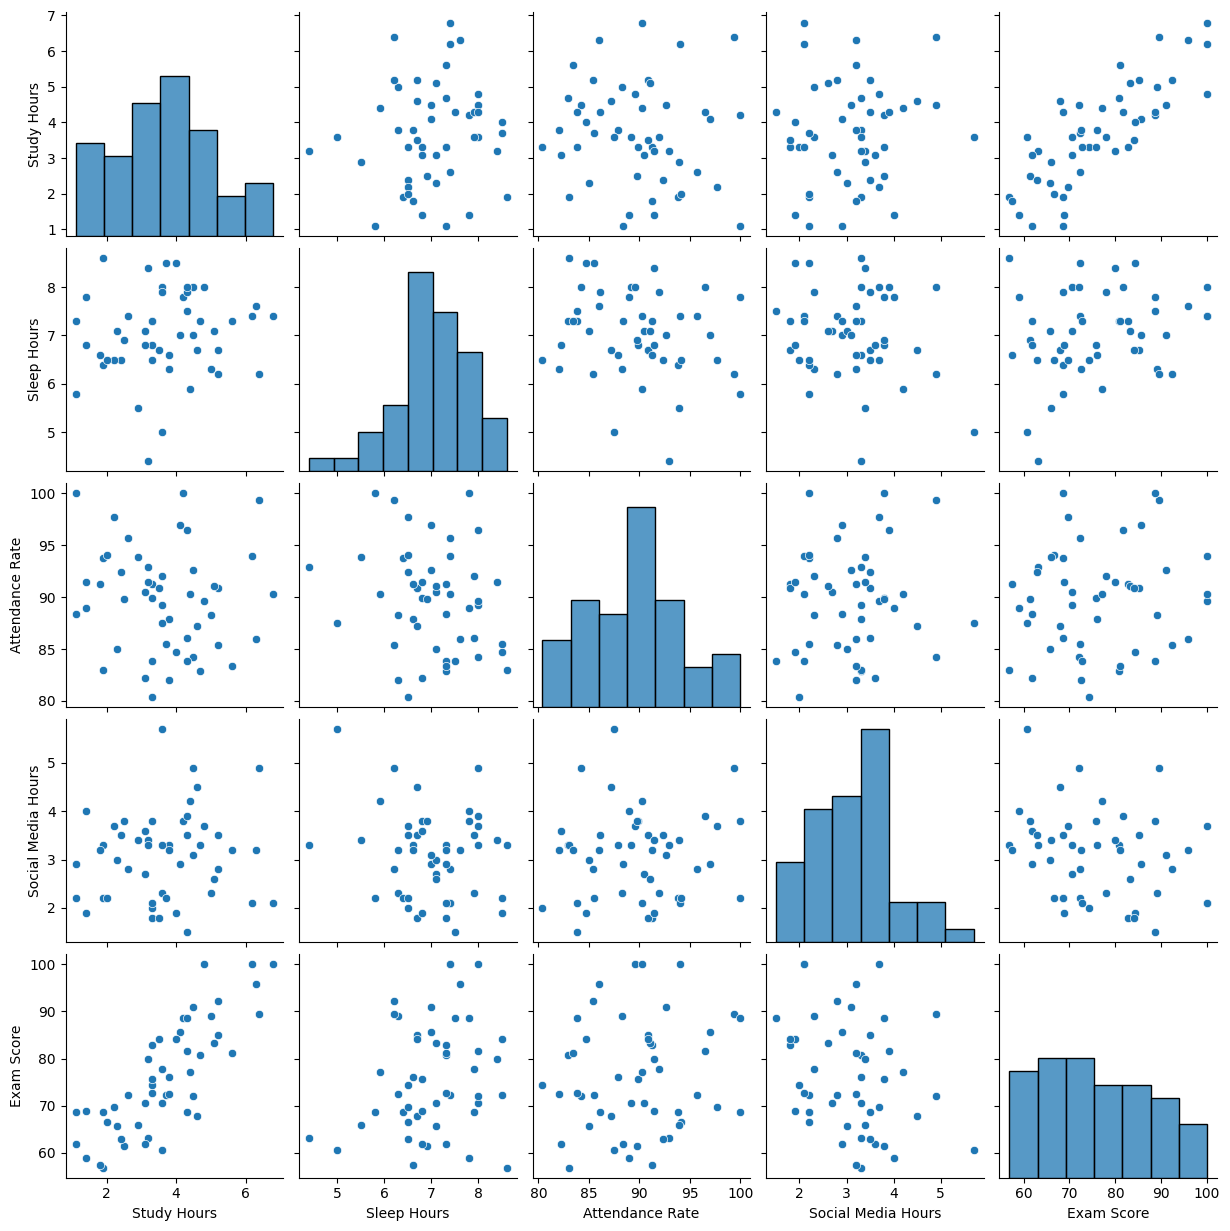

In [6]:
sns.pairplot(df)
plt.show()

In [7]:
df.corr()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
Study Hours,1.000000,0.114015,-0.112860,0.115023,0.804266
Sleep Hours,0.114015,1.000000,-0.222024,-0.177166,0.227694
Attendance Rate,-0.112860,-0.222024,1.000000,0.068272,0.123791
Social Media Hours,0.115023,-0.177166,0.068272,1.000000,-0.248743
Exam Score,0.804266,0.227694,0.123791,-0.248743,1.000000


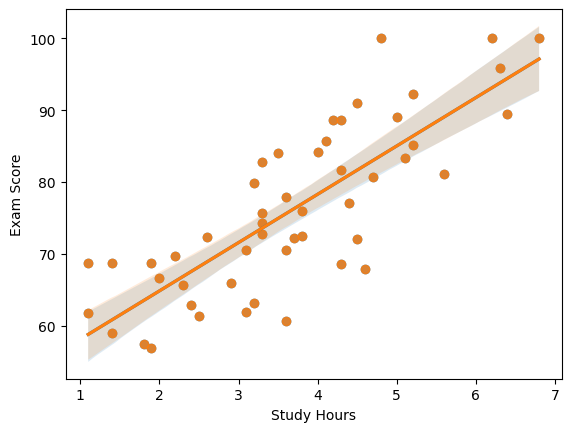

In [9]:
sns.regplot(x = df["Study Hours"], y = df["Exam Score"])
plt.show()

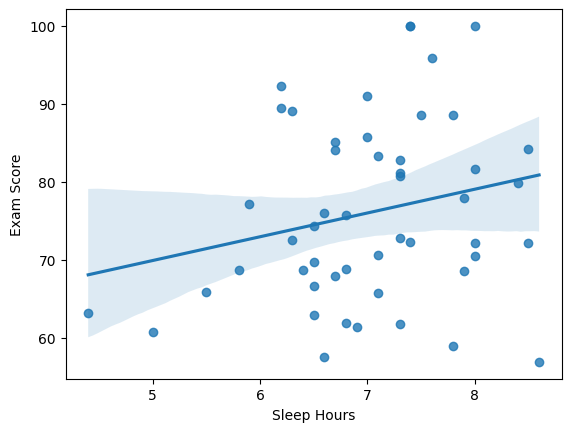

In [10]:
sns.regplot(x = df["Sleep Hours"], y = df["Exam Score"])
plt.show()

In [15]:
# independent and dependent features 
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

#X = df[["Study Hours", "Sleep Hours", "Attendance Rate", "Social Media Hours"]]
#y = df["Exam Score"]

In [16]:
X.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours
0,4.7,7.3,82.9,3.3
1,3.8,6.6,87.9,3.3
2,5.0,6.3,88.3,2.3
3,6.3,7.6,86.0,3.2
4,3.6,8.0,89.2,3.3


In [17]:
y.head()

0    80.7
1    76.0
2    89.1
3    95.9
4    70.5
Name: Exam Score, dtype: float64

In [18]:
# train-test split 

In [19]:
from sklearn.model_selection import train_test_split 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 15)

In [21]:
from sklearn.preprocessing import StandardScaler 

In [22]:
scaler = StandardScaler()

In [23]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
X_train

array([[ 7.64922342e-01,  1.07637448e+00,  2.70413080e-03,
         6.75932027e-01],
       [-1.60676425e+00, -3.94765312e-01,  3.42883785e-01,
         1.46070057e-01],
       [ 1.39737210e+00,  3.40804586e-01, -1.23795108e+00,
         1.46070057e-01],
       [-1.92298913e+00, -1.84602484e-01,  3.82904921e-01,
        -1.23157107e+00],
       [ 2.11528804e-01,  2.55603439e-02,  1.48348616e+00,
        -1.71847126e-01],
       [ 2.90585024e-01,  8.66211656e-01,  2.08380319e+00,
         7.81904421e-01],
       [-2.56398550e-02, -7.10009554e-01, -1.51809903e+00,
         1.46070057e-01],
       [ 9.23034781e-01, -7.10009554e-01, -2.57433252e-01,
        -8.07681490e-01],
       [-4.20920953e-01,  3.40804586e-01, -1.15790881e+00,
        -1.01962628e+00],
       [-2.56398550e-02, -3.94765312e-01, -3.37475524e-01,
         2.52042451e-01],
       [ 3.69641243e-01,  5.50967414e-01, -1.15790881e+00,
        -1.65546064e+00],
       [-9.74314491e-01,  4.45886000e-01,  1.22334877e+00,
      

In [25]:
from sklearn.linear_model import LinearRegression 

In [26]:
regression = LinearRegression()

In [27]:
regression.fit(X_train, y_train)

LinearRegression()

In [28]:
X_test[0]

array([-1.29053937, -0.49984673,  1.62356013,  0.67593203])

In [41]:
new_student = [[5,7,80,4]]

In [42]:
new_student_scaled = scaler.transform(new_student)

/Users/batuhanbasoda/Desktop/CENG/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [43]:
regression.predict(new_student_scaled)

array([75.74443209])

In [44]:
# prediction 

In [45]:
y_pred = regression.predict(X_test)

In [46]:
y_pred

array([ 67.04704385,  57.90545589,  83.63084813,  63.69399367,
        69.73079557,  80.76485587,  93.76445033,  65.93953528,
        64.58675718,  78.42296106,  56.67860558,  64.44046585,
       102.60438643])

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

In [48]:
mse = mean_squared_error(y_test, y_pred)
mea = mean_absolute_error(y_test, y_pred)
print("mse: ", mse)
print("mea: ", mea)

mse:  14.600589378986264
mea:  3.2770264859627867


In [50]:
r2 = r2_score(y_test, y_pred)
print("r2 score: ", r2)

r2 score:  0.915670734577271


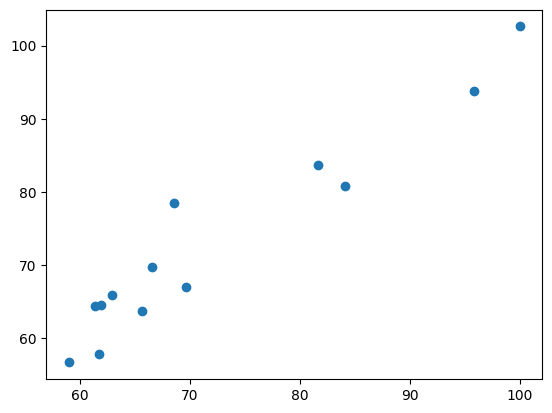

In [51]:
plt.scatter(y_test, y_pred)
plt.show()

In [52]:
regression.intercept_

np.float64(77.41081081081082)

In [53]:
regression.coef_

array([ 9.28014703,  1.78967062,  3.24340001, -4.08127695])

In [54]:
new_student

[[5, 7, 80, 4]]

In [55]:
students = [
    [6,8,95,5],   
    [3,6,85,4],
    [4,7,80,3]
]

In [56]:
regression.predict(scaler.transform(students))

/Users/batuhanbasoda/Desktop/CENG/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([90.37189122, 62.43586785, 72.73292556])